In [23]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/analytics/main/_static/data/commerce.csv")
pd.set_option('display.max_columns', None)
import seaborn as sns

In [24]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0


In [25]:
# Select feature for simple regression
X = df[['Response']]

# Create response
y = df["MntWines"]

In [26]:
#sns.relplot(x="Response", y='MntWines',data=df);

In [27]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression()

In [30]:
reg.fit(X_train, y_train)

LinearRegression()

In [31]:
# Model coefficients
print('Coefficients: \n', "Intercept:", reg.intercept_, "\n Coefficient:", reg.coef_)

Coefficients: 
 Intercept: 275.41352805534206 
 Coefficient: [227.35919922]


In [32]:
# Prediction
y_pred = reg.predict(X_test)
y_pred

array([502.77272727, 502.77272727, 275.41352806, 275.41352806,
       275.41352806, 502.77272727, 502.77272727, 275.41352806,
       502.77272727, 275.41352806, 275.41352806, 275.41352806,
       502.77272727, 275.41352806, 502.77272727, 502.77272727,
       275.41352806, 275.41352806, 275.41352806, 275.41352806,
       275.41352806, 275.41352806, 275.41352806, 275.41352806,
       275.41352806, 275.41352806, 502.77272727, 275.41352806,
       275.41352806, 275.41352806, 275.41352806, 275.41352806,
       275.41352806, 275.41352806, 275.41352806, 502.77272727,
       275.41352806, 275.41352806, 275.41352806, 275.41352806,
       275.41352806, 275.41352806, 275.41352806, 275.41352806,
       502.77272727, 275.41352806, 275.41352806, 275.41352806,
       275.41352806, 275.41352806, 502.77272727, 275.41352806,
       275.41352806, 275.41352806, 275.41352806, 275.41352806,
       275.41352806, 275.41352806, 275.41352806, 275.41352806,
       275.41352806, 275.41352806, 275.41352806, 275.41

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y_test, y_pred)

0.06146183807659189

In [35]:
# pretty output
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.06


In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mean_squared_error(y_test, y_pred)

102261.79610581181

In [38]:
mean_squared_error(y_test, y_pred, squared=False)

319.7839835041959

In [39]:
# Create a new MntWines value
X_new = pd.DataFrame({"MntWines": [50000]})

In [40]:
reg.predict(X_new)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- MntWines
Feature names seen at fit time, yet now missing:
- Response

  warnings.warn(message, FutureWarning)


array([11368235.3743973])

In [41]:
from pathlib import Path

# show current working directory
Path.cwd()

PosixPath('/Users/rafaela/test')

In [42]:
from joblib import dump, load

# store model in current working directory with Path()
dump(reg, Path('my_linear_model.joblib'))

['my_linear_model.joblib']

In [43]:
# load model and save it as reg2 
reg2 = load(Path('my_linear_model.joblib')) 

In [44]:
# make a prediction
reg2.predict(X_new)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- MntWines
Feature names seen at fit time, yet now missing:
- Response

  warnings.warn(message, FutureWarning)


array([11368235.3743973])

In [47]:
import statsmodels.formula.api as smf

# Estimate the model 
lm = smf.ols(formula ='MntWines ~ Response', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MntWines   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     141.4
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           1.22e-31
Time:                        20:56:25   Log-Likelihood:                -15896.
No. Observations:                2205   AIC:                         3.180e+04
Df Residuals:                    2203   BIC:                         3.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    271.2190      7.563     35.860      0.000     256.387     286.051
Response     231.3966     19.462     11.890      0.000     193.231     269.562
==============================================================================
Omnibus:                      282.917   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              398.621
Skew:                           1.022   Prob(JB):                     2.76e-87
Kurtosis:                       3.398   Cond. No.                         2.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

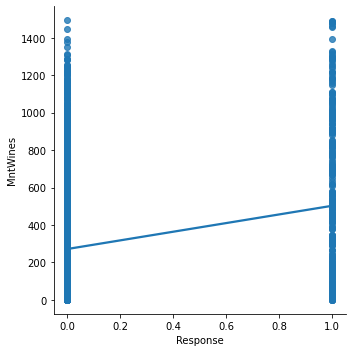

In [48]:
# Plot regression line 
sns.lmplot(data=df, x="Response", y="MntWines", ci=False);